X 的形状: (100, 2)
y 的形状: (100,)
训练集 X 形状: (80, 2)


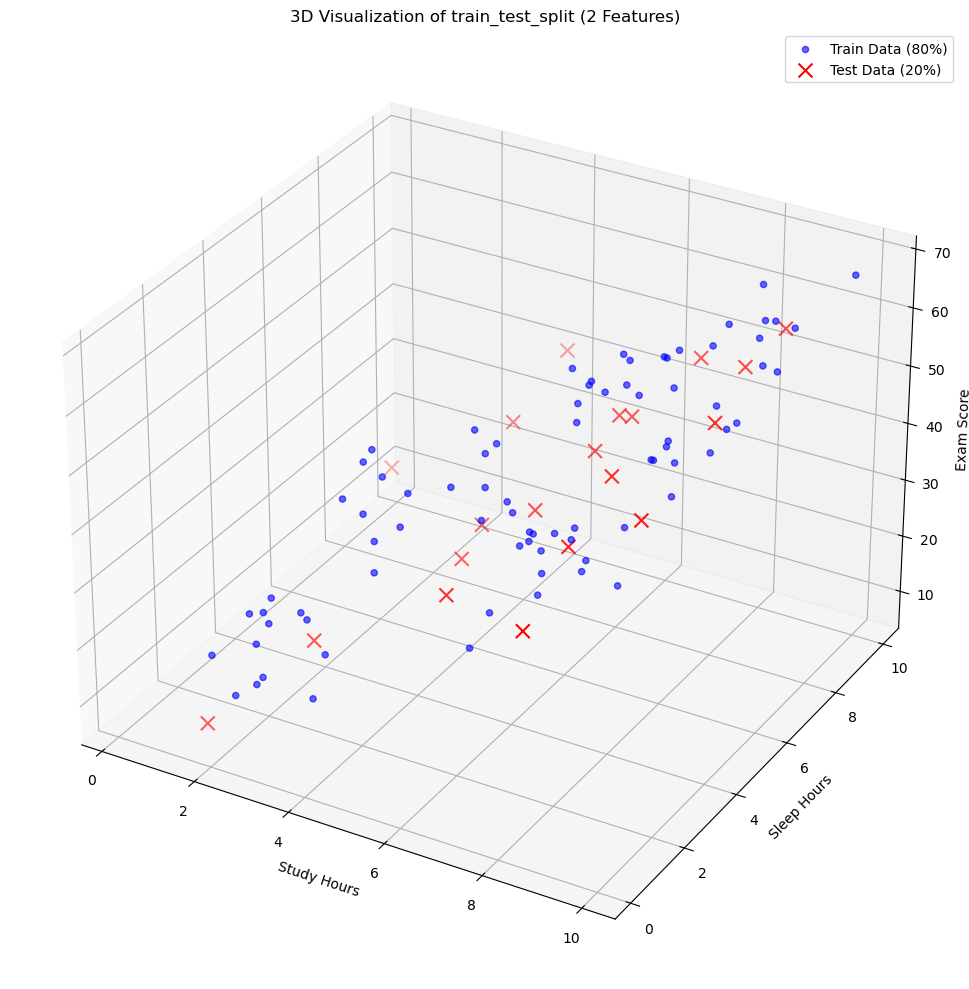

In [17]:
# 数据集拆分
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


n_samples = 100

# X 是特征：学习时长、睡眠时长 (100行, 2列)
# random.rand 生成 [0,1) 之间的均匀分布数值，乘以10让数值范围0~10
# random.randn 生成标准正态分布数值
X = np.random.rand(n_samples, 2) * 10 

# y 是成绩：我们造一个公式 y = 5*学习 + 2*睡眠 + 噪声
# X[:, 0]：取表格中第 1 列的所有数据（学习时长）ndarray
y = 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(n_samples) * 2

# 现在 X 是 (100, 2)，y 是 (100,)，对齐
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print(f"X 的形状: {X.shape}") #  (100, 2)
print(f"y 的形状: {y.shape}") #  (100,)
print(f"训练集 X 形状: {X_train.shape}") # (80, 2)


fig = plt.figure(figsize=(10,10)) # 画布
ax = fig.add_subplot(111, projection='3d') # 三维坐标系
# 行数、列数、第几个子图 111 表示 1 行 1 列的第 1 个图 即画布就这一张图
# 2D 散点图用 ax = fig.add_subplot(111) 两个特征需要三维图

# 绘制训练集：蓝色圆点
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, 
           color='blue', label='Train Data (80%)', alpha=0.6)

# 绘制测试集：红色叉号
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, 
           color='red', label='Test Data (20%)', marker='x', s=100)

ax.set_xlabel('Study Hours')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Exam Score')
plt.title("3D Visualization of train_test_split (2 Features)")
plt.legend()
plt.tight_layout()
plt.show()

机器猜的系数 (对应我们设的 5): 5.00
机器猜的截距 (对应我们设的 2): 2.23


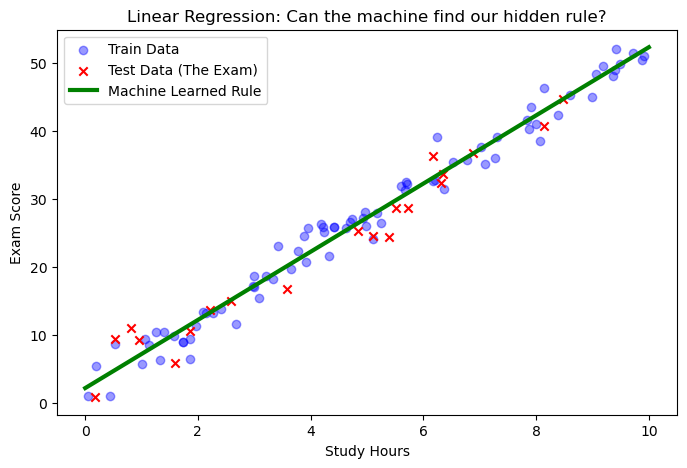

In [ ]:
# print(X[:5])  查看前5行特征数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 导入线性回归模型

X = np.random.rand(100, 1) * 10  # 100个学生的学习时间 (0-10)
y = 5 * X.flatten() + 2 + np.random.randn(100) * 2 
# 成绩 = 5*学习 + 2 + 噪声

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression() # 线性回归 方程y=w1x1+...+wnxn+b
model.fit(X_train, y_train) 

print(f"机器猜的系数 (对应我们设的 5): {model.coef_[0]:.2f}") # w数组
print(f"机器猜的截距 (对应我们设的 2): {model.intercept_:.2f}") # 截距b
# 下划线后缀 表示属性是训练好后才能访问

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.4) 
plt.scatter(X_test, y_test, color='red', label='Test Data (The Exam)', marker='x')

x_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='green', linewidth=3, label='Machine Learned Rule')

plt.title("Linear Regression: Can the machine find our hidden rule?")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

【机器学到的系数 (Scaled)】: 14.33
【机器学到的截距 (Scaled)】: 25.32


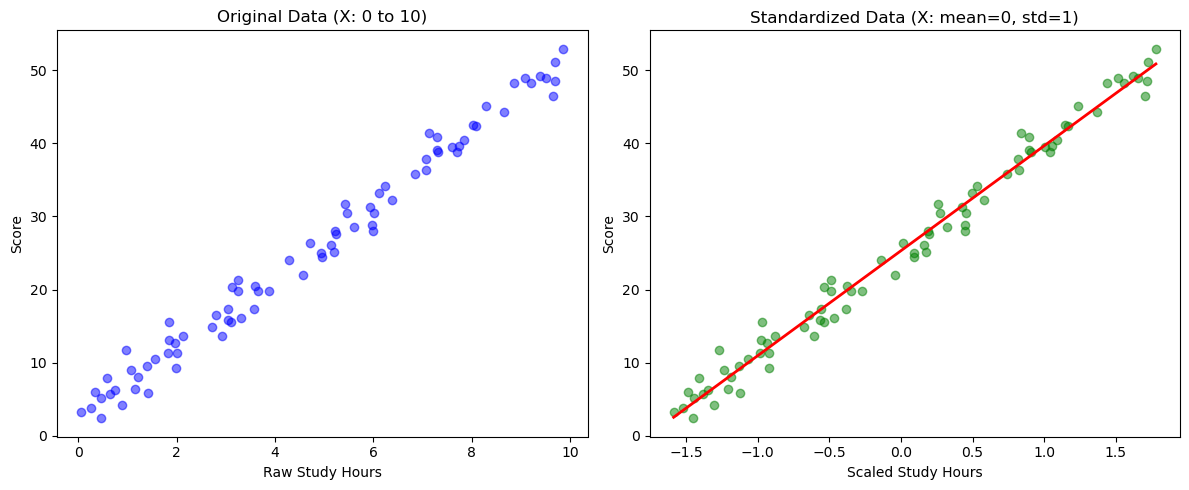

In [ ]:
# 标准化 Feature Scaling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 学习时长 (0-10) rand [0,1)

y = 5 * X.flatten() + 2 + np.random.randn(100) * 2


X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
# x -> (x - mean) / std 均值为0，标准差为1

# 在训练集上 fit (学到均值和标准差) 并转换
X_train_scaled = scaler.fit_transform(X_train_raw)

# 在测试集上只进行 transform 
X_test_scaled = scaler.transform(X_test_raw)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"【机器学到的系数 (Scaled)】: {model.coef_[0]:.2f}")
print(f"【机器学到的截距 (Scaled)】: {model.intercept_:.2f}")

# 为什么系数不是 5：
# 因为 X 从 [0, 10] 缩放到了大约 [-1.7, 1.7]，范围变窄了。
# 为了算出同样的成绩 y，系数必须变大，来补偿 X 的变小。
# 现在系数意义为 “X 每增加 1 个标准差，y 增加多少”。

plt.figure(figsize=(12, 5))

# 图1：原始数据的线性关系
plt.subplot(1, 2, 1) # 画布 一行两列画第一个
plt.scatter(X_train_raw, y_train, color='blue', alpha=0.5)
plt.title("Original Data (X: 0 to 10)")
plt.xlabel("Raw Study Hours")
plt.ylabel("Score")

# 图2：标准化后的线性关系
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled, y_train, color='green', alpha=0.5)
# 画出预测线 model.predict()只接受二维矩阵 
# .reshape(-1, 1) 1列 行数看着办
x_line = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.title("Standardized Data (X: mean=0, std=1)")
plt.xlabel("Scaled Study Hours")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

模型的均方误差 (MSE): 2.61
平均每科成绩误差约: 1.62 分


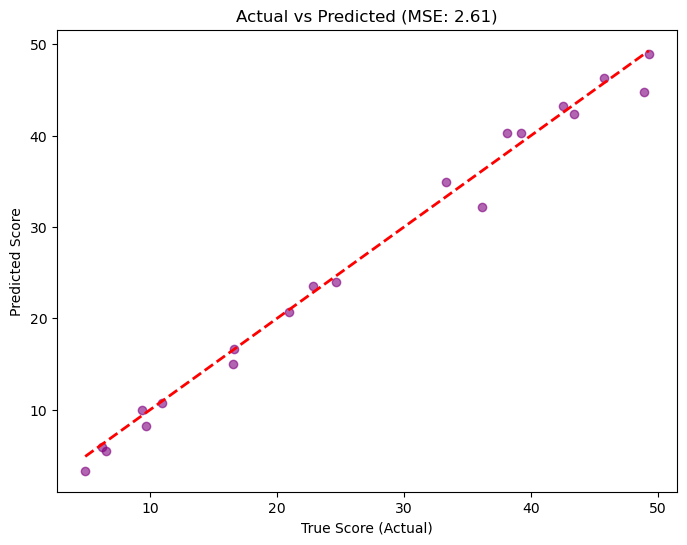

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# MSE
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 * X.flatten() + 2 + np.random.randn(100) * 2

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f"模型的均方误差 (MSE): {mse:.2f}")

# RMSE (均方根误差)，它的单位和 y 一致 公式为 sqrt(MSE)
print(f"平均每科成绩误差约: {np.sqrt(mse):.2f} 分")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
# 画一条 45 度的理想线：如果预测完美，点应该全在线上
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("True Score (Actual)")
plt.ylabel("Predicted Score")
plt.title(f"Actual vs Predicted (MSE: {mse:.2f})")
plt.show()

分类准确率: 87.5%
(14161,)
(119, 119)


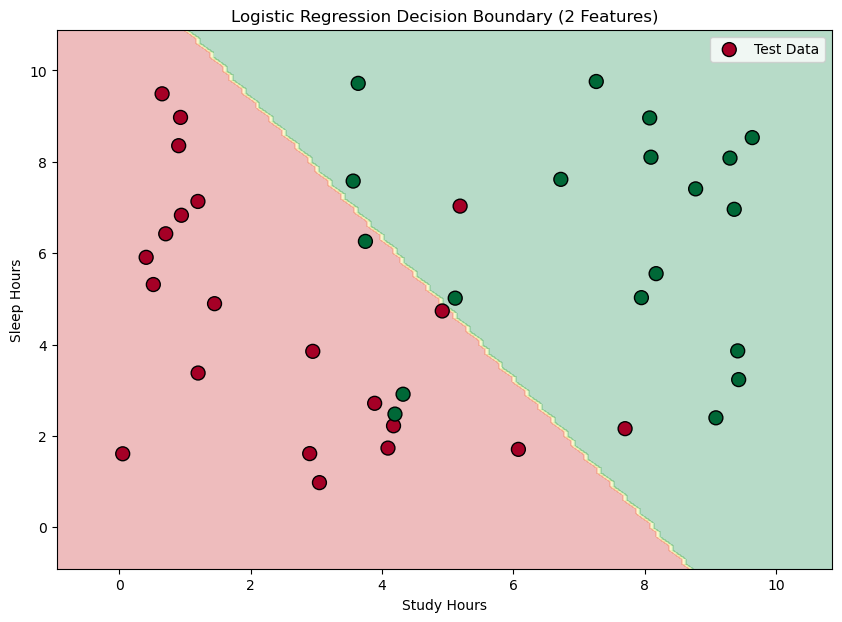

In [ ]:
# Logistic Regression 二分类
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#两个特征（学习时长，睡眠时长）
np.random.seed(42)
n_samples = 200

# X1: 学习时长 (0-10), X2: 睡眠时长 (0-10) X是 (200, 2) ndarray
X = np.random.rand(n_samples, 2) * 10 

# 及格(1) 取决于 0.6*学习 + 0.4*睡眠 是否大于 5

y = (0.6 * X[:, 0] + 0.4 * X[:, 1] + 
     np.random.randn(n_samples) * 0.8 > 5).astype(int) #一维数组

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print(f"分类准确率: {accuracy_score(y_test, y_pred) * 100:.1f}%")
# 判断对的比例

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# 交织网络 xx是每个网格点的第一个特征值，yy是第二个特征值，即横纵坐标的数组

# 预测网格中每个点的类别
# np.c_：把横、纵坐标配对，变成一个个坐标点 (x, y)。
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape)
Z = Z.reshape(xx.shape) # Z是预测结果0,1数组
print(Z.shape)
plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
# contourf：绘制等高线填充图
# 把结果相同的、挨在一起的小点融化成一大片颜色。t
# 图中红色背景和绿色背景，是那 14161 个微小预测点的“集体合影”

# 画出测试集的点：红色是挂科(0)，绿色是及格(1)
# y_test的y=1就是绿色，及格；y=0红色，挂科
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlGn', 
            edgecolors='k', s=100, label='Test Data')

plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Logistic Regression Decision Boundary (2 Features)')
plt.legend()
plt.show()

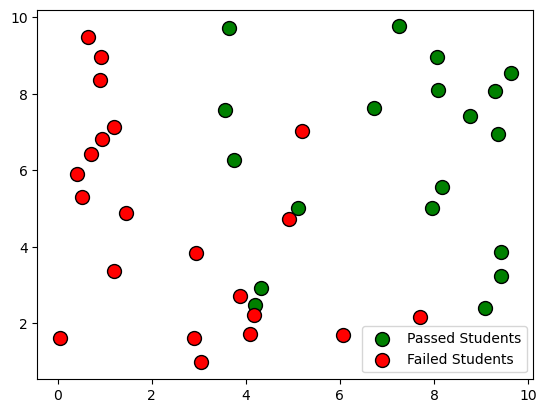

In [ ]:
pass_idx = (y_test == 1)
fail_idx = (y_test == 0)

plt.scatter(X_test[pass_idx, 0], X_test[pass_idx, 1], 
            color='green', edgecolors='k', s=100, label='Passed Students')
# 学习时长 睡眠时长
plt.scatter(X_test[fail_idx, 0], X_test[fail_idx, 1], 
            color='red', edgecolors='k', s=100, label='Failed Students')

plt.legend()
plt.show()

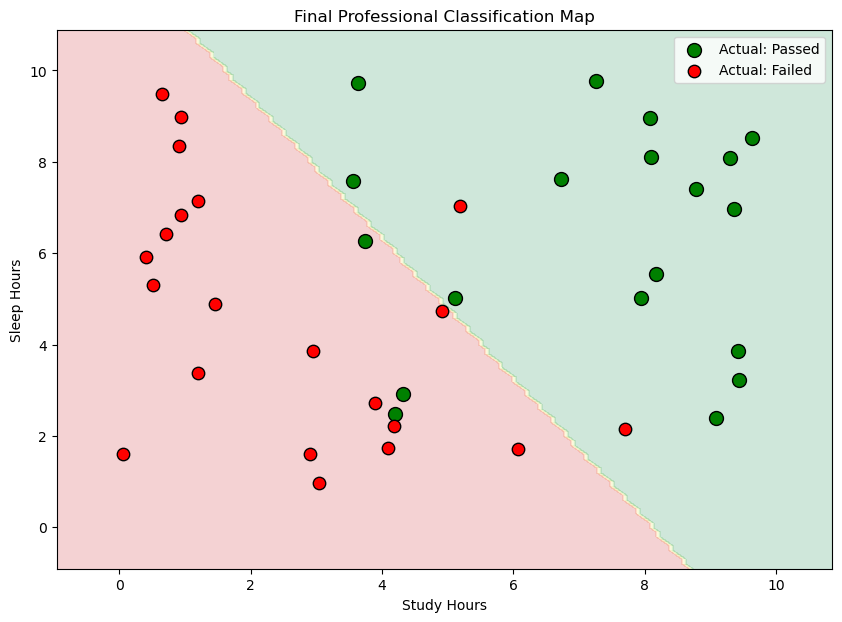

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
X = np.random.rand(200, 2) * 10 
y = (0.6 * X[:, 0] + 0.4 * X[:, 1] + np.random.randn(200) * 0.8 > 5).astype(int)
# y 是 0，1数组
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))

# cmap='RdYlGn' 会让挂科区0变红，及格区1变绿
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdYlGn') # 上背景色

pass_idx = (y_test == 1)
fail_idx = (y_test == 0)

# 画及格的点（绿色）k 点边框黑色 s=100点大小
plt.scatter(X_test[pass_idx, 0], X_test[pass_idx, 1], 
            color='green', edgecolors='k', s=100, label='Actual: Passed')

# 画挂科的点（红色）
plt.scatter(X_test[fail_idx, 0], X_test[fail_idx, 1], 
            color='red', edgecolors='k', s=80, label='Actual: Failed')

plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Final Professional Classification Map')
plt.legend() 
plt.show()

In [ ]:
import numpy as np

# 1. 假设 X轴坐标是 [1, 2, 3]，Y轴坐标是 [10, 20, 30]
x_coords = np.array([1, 2, 3])
y_coords = np.array([10, 20, 30])

# 2. 生成网格 xx 和 yy
xx, yy = np.meshgrid(x_coords, y_coords)

print("--- xx (横坐标矩阵) ---")
print(xx) 
# 把 [1,2,3] 复制了三行，记录了每个格子的横坐标

print("\n--- yy (纵坐标矩阵) ---")
print(yy)
# 把 [10,20,30] 复制了三列，记录了每个格子的纵坐标

# 3. ravel() 是什么？它就是把矩阵“拉直”成一排
print("\n--- xx.ravel() (拉直后) ---")
print(xx.ravel()) # [1 2 3 1 2 3 1 2 3]

# 4. np.c_ 把拉直后的横纵坐标两两配对，变成坐标点
grid_points = np.c_[xx.ravel(), yy.ravel()]
print("\n--- 配对后的坐标点 (前 5 个) ---")
print(grid_points[:5])
# 结果像这样：[1, 10], [2, 10], [3, 10]... 这就是地图上每个格子的位置

--- xx (横坐标矩阵) ---
[[1 2 3]
 [1 2 3]
 [1 2 3]]

--- yy (纵坐标矩阵) ---
[[10 10 10]
 [20 20 20]
 [30 30 30]]

--- xx.ravel() (拉直后) ---
[1 2 3 1 2 3 1 2 3]

--- 配对后的坐标点 (前 5 个) ---
[[ 1 10]
 [ 2 10]
 [ 3 10]
 [ 1 20]
 [ 2 20]]


In [ ]:
x = [1, 2, 3]
y = [10, 20]
xx, yy = np.meshgrid(x, y)
print("xx:\n", xx)
print("yy:\n", yy)
print("\nxx.ravel():\n", xx.ravel())
print("\nyy.ravel():\n", yy.ravel())
print(f'\nnp.c_ result:\n', np.c_[xx.ravel(), yy.ravel()]) #(6, 2)数组

xx:
 [[1 2 3]
 [1 2 3]]
yy:
 [[10 10 10]
 [20 20 20]]

xx.ravel():
 [1 2 3 1 2 3]

yy.ravel():
 [10 10 10 20 20 20]

np.c_ result:
 [[ 1 10]
 [ 2 10]
 [ 3 10]
 [ 1 20]
 [ 2 20]
 [ 3 20]]
<class 'numpy.ndarray'>
(6, 2)


总共有 1797 张图片，每张图片有 64 个像素点。
机器人的考试准确率: 97.22%


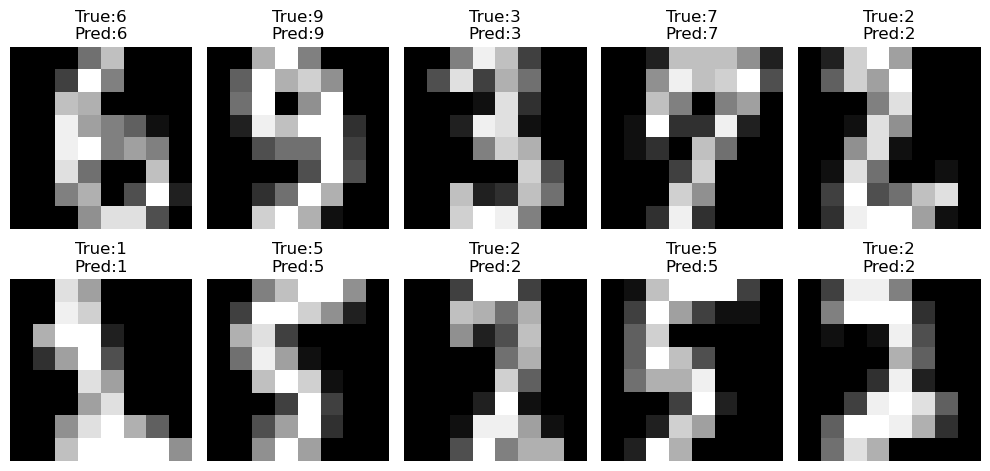

In [40]:
# 手写数字识别  $8 \times 8$ 像素的灰度图 64维向量 一张图64个像素
# 每个像素有一个亮度值（0 代表纯白，16 代表纯黑）。
# 机器的任务就是：在 64 维的空间里划出 10 块领地。
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns # 热力图

digits = load_digits()
# X 是特征（64个像素值），y 是标签（数字 0-9）
X, y = digits.data, digits.target # X (1797, 64) y (1797,) ndrraay

print(f"总共有 {X.shape[0]} 张图片，每张图片有 {X.shape[1]} 个像素点。")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 像素值通常在 0-16 之间，标准化能让模型跑得更稳
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"机器人的考试准确率: {acc * 100:.2f}%")

# 前 10 张测试图片，机器猜对了吗？
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # 将 64 维向量还原回 8x8 的矩阵用于显示
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True:{y_test[i]}\nPred:{y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

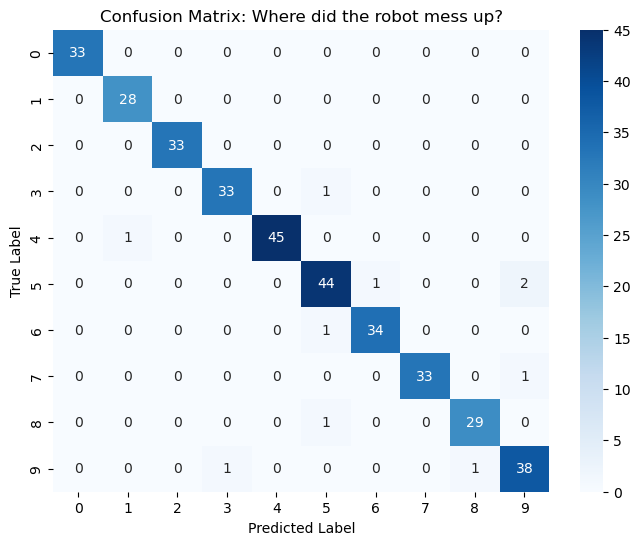

In [41]:
# 生成混淆矩阵 测试集 约1797*20%=360张
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where did the robot mess up?')
plt.show()

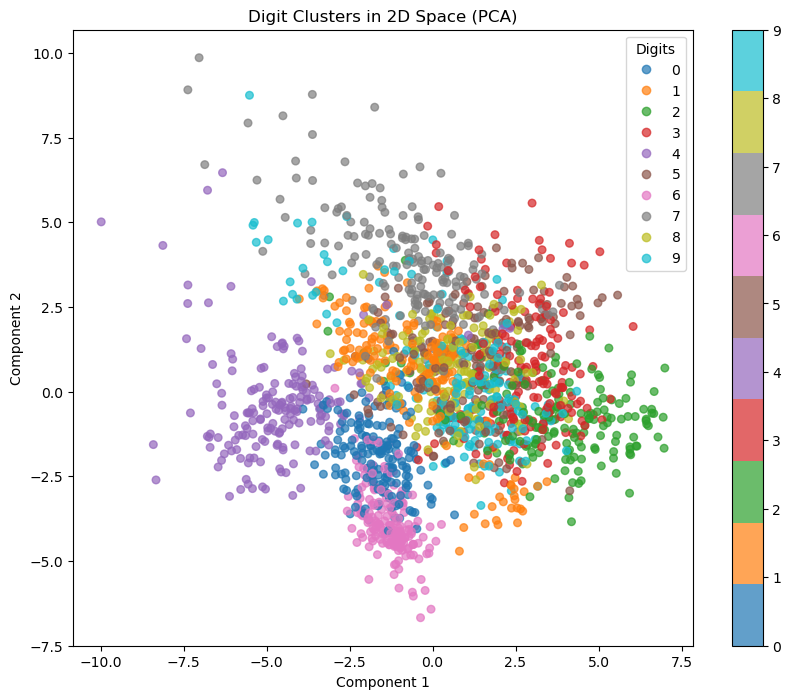

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data) # array (1797, 64)

# 2. PCA 降维：把 64 维压成 2 维 看数字分布
pca = PCA(n_components=2) # 无监督学习模型 找出最能代表数据特征的2个方向
X_pca = pca.fit_transform(X_scaled) # (1797, 2) 

# 3. 绘图：10 种颜色代表 10 个数字 c=digits.target是0-9标签
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, 
                      cmap='tab10', alpha=0.7, s=30)

# 添加图例 图例显示十种颜色
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("Digit Clusters in 2D Space (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter)
plt.show()

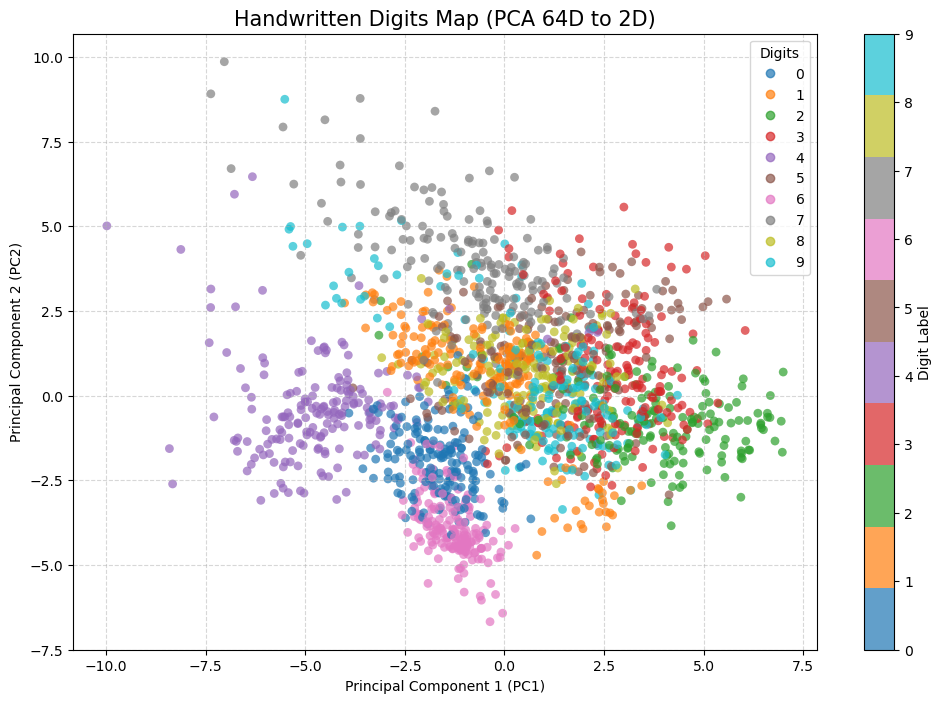

这两个轴解释了原始数据中 21.59% 的信息量。
【模型评估】仅凭 2 个特征，识别 10 类数字的准确率为: 53.89%


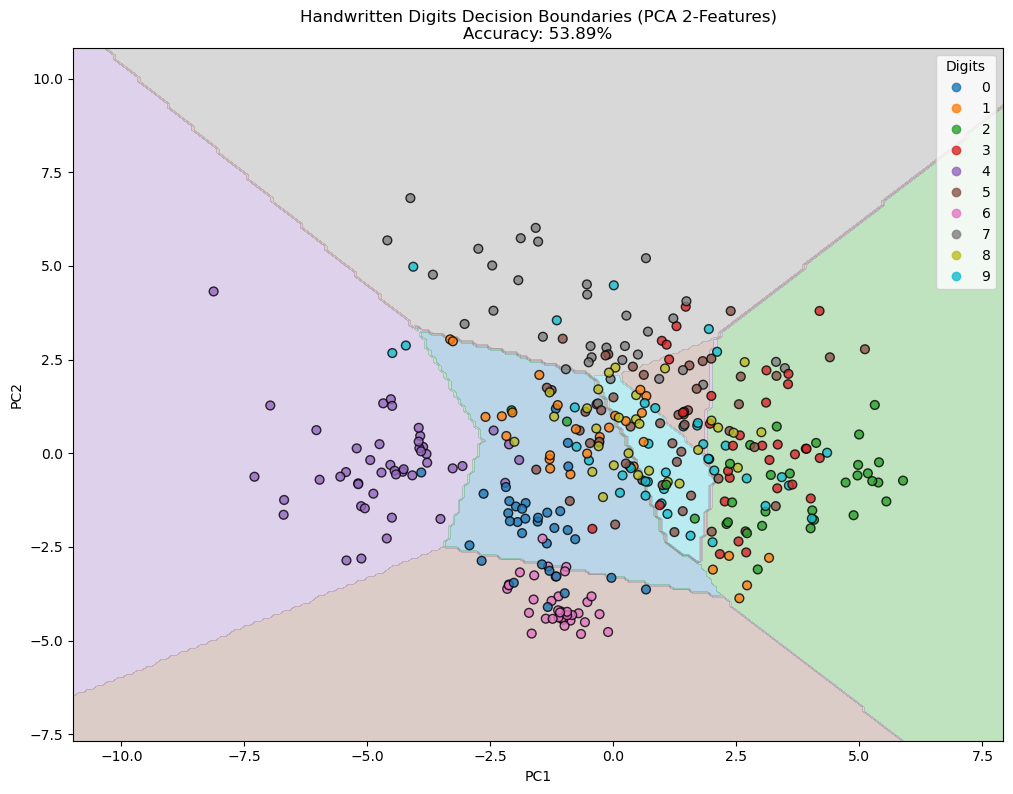

In [ ]:
# PCA 降维后分类
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data    # 原始 64 维数据 (1797, 64)
y = digits.target  # 真实标签 (0-9)

# 2. 标准化数据
# PCA 对数据的量级敏感，缩放到均值为0、方差为1 让降维效果更好
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 8))

# c=y 根据数字类别涂色，cmap='tab10' 是专门为 10 类分类准备的配色方案
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                      cmap='tab10', alpha=0.7, s=40, edgecolors='none')

# *scatter.legend_elements() 会自动解包并根据颜色生成 0-9 的标签
plt.legend(*scatter.legend_elements(), title="Digits", loc="best")
plt.colorbar(scatter, label="Digit Label")

plt.title("Handwritten Digits Map (PCA 64D to 2D)", fontsize=15)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# 解释方差比之和 即信息保留率
# pca.explained_variance_ratio_是数组，
# 代表每个新坐标轴（主成分）捕捉到了原始数据中百分之多少的波动
print(f"这两个轴解释了原始数据中 {np.sum(pca.explained_variance_ratio_)*100:.2f}% 的信息量。")

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- 4. 预测与评估 ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"【模型评估】仅凭 2 个特征，识别 10 类数字的准确率为: {acc * 100:.2f}%")

# --- 5. 画图：决策边界 (这步最震撼，能看到 10 个数字的地盘) ---
plt.figure(figsize=(12, 9))

# 创建网格
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# 预测整个背景的颜色 (10类分类)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 画出彩色地盘 (cmap用tab10，对应10个数字)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

# 画出真实的测试点
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='tab10', 
            edgecolors='k', s=40, alpha=0.8)

# 添加图例和说明
plt.legend(*scatter.legend_elements(), title="Digits", loc="best")
plt.title(f"Handwritten Digits Decision Boundaries (PCA 2-Features)\nAccuracy: {acc*100:.2f}%")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


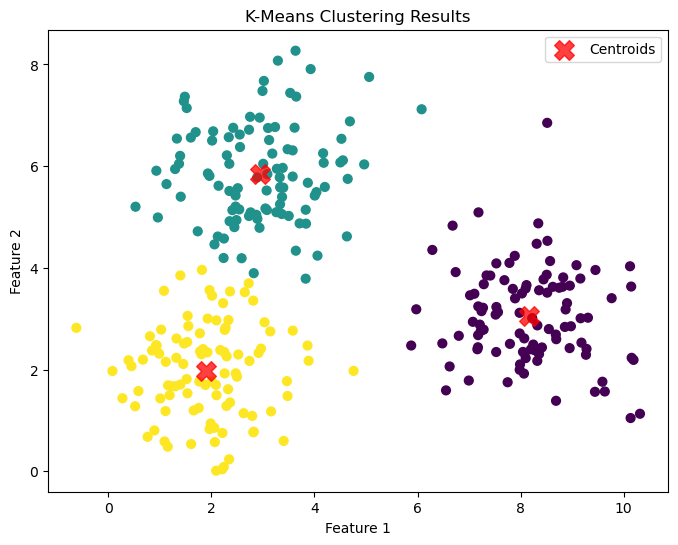

In [60]:
# 无监督学习-聚类 K-Means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
np.random.seed(42)
n_samples = 300
# 造三个簇的数据 vstack垂直堆叠
cluster_centers = np.array([[2, 2], [8, 3], [3, 6]])
X = np.vstack([
    np.random.randn(n_samples // 3, 2) + center   
    for center in cluster_centers
]) # (300, 2) ndarray

kmeans = KMeans(n_clusters=3, random_state=42) # 分类器
kmeans.fit(X) # 寻找三个簇最优中心点
y_kmeans = kmeans.predict(X) # 分类 0 1 2

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='viridis')
# 画出质心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

回归模型测试集 MSE: 1.0442


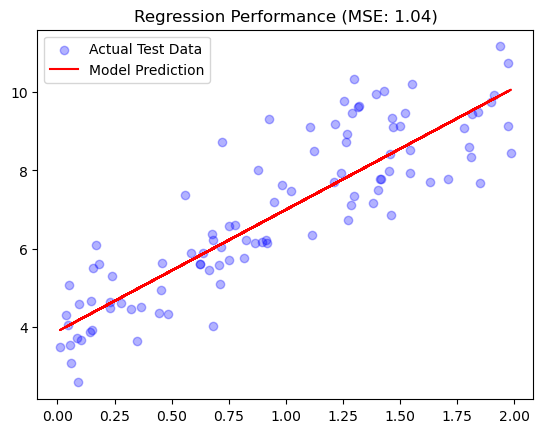

In [63]:
# 回归 MSE RMSE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 3 * X + np.random.randn(500, 1) 

# (shuffle默认开启)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_test_pred = reg_model.predict(X_test)

mse_score = mean_squared_error(y_test, y_test_pred)

print(f"回归模型测试集 MSE: {mse_score:.4f}")

plt.scatter(X_test, y_test, color='blue', alpha=0.3, label='Actual Test Data')
plt.plot(X_test, y_test_pred, color='red', label='Model Prediction')
plt.title(f"Regression Performance (MSE: {mse_score:.2f})")
plt.legend()
plt.show()

分类模型准确率: 97.22%

综合分类报告:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



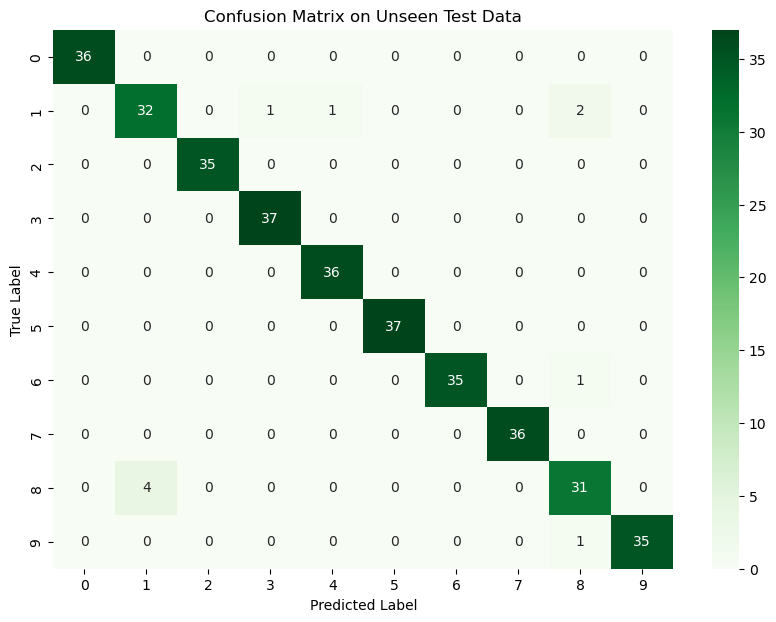

In [ ]:
# 分类 手写数字识别
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

digits = load_digits()
X, y = digits.data, digits.target # X (1797, 64) y (1797,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# A. Accuracy: 整体正确率
acc = accuracy_score(y_test, y_pred)

# B. Classification Report: 
# 包含 Precision(查准率), Recall(查全率), F1-score
report = classification_report(y_test, y_pred)

# C. Confusion Matrix: 混淆矩阵
cm = confusion_matrix(y_test, y_pred) # 二维数组 (10, 10)

print(f"分类模型准确率: {acc*100:.2f}%")
print("\n综合分类报告:\n", report)

# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') # decimal整数
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Unseen Test Data')
plt.show()

Pipeline 分类模型准确率: 87.50%


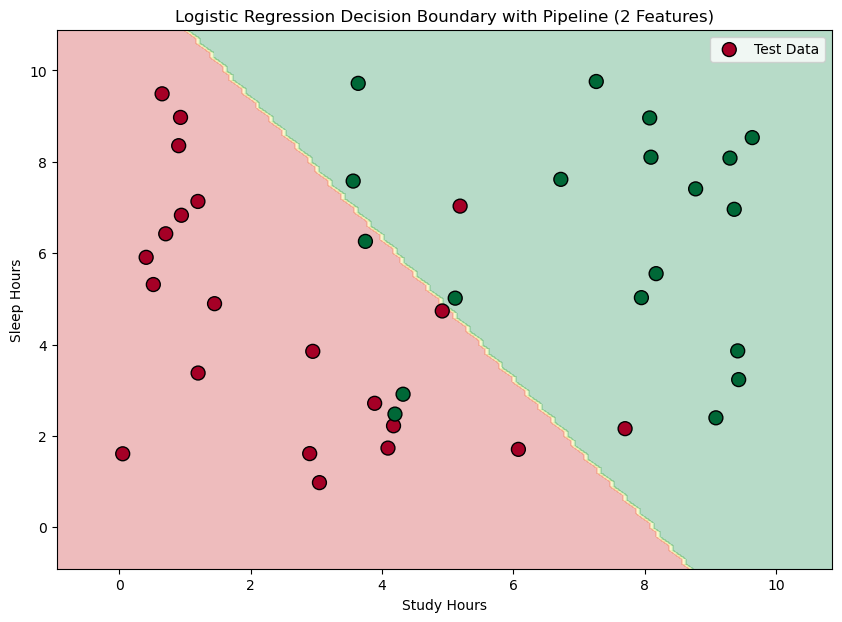

In [66]:
# sklearn.Pipeline 示例
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
# 造数据
np.random.seed(42)
X = np.random.rand(200, 2) * 10 
y = (0.6 * X[:, 0] + 0.4 * X[:, 1] + np.random.randn(200) * 0.8 > 5).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# 创建流水线
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 第一步：标准化
    ('classifier', LogisticRegression())  # 第二步：逻辑回归分类器
])
# 训练流水线
pipeline.fit(X_train, y_train)
# 预测
y_pred = pipeline.predict(X_test)
# 评估
acc = accuracy_score(y_test, y_pred)
print(f"Pipeline 分类模型准确率: {acc * 100:.2f}%")
# 可视化
import matplotlib.pyplot as plt
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlGn', 
            edgecolors='k', s=100, label='Test Data')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Logistic Regression Decision Boundary with Pipeline (2 Features)')
plt.legend()
plt.show()


最佳参数: {'classifier__max_depth': 5, 'classifier__n_estimators': 50, 'preprocessor__num__imputer__strategy': 'mean'}
最佳验证集得分: 0.8137


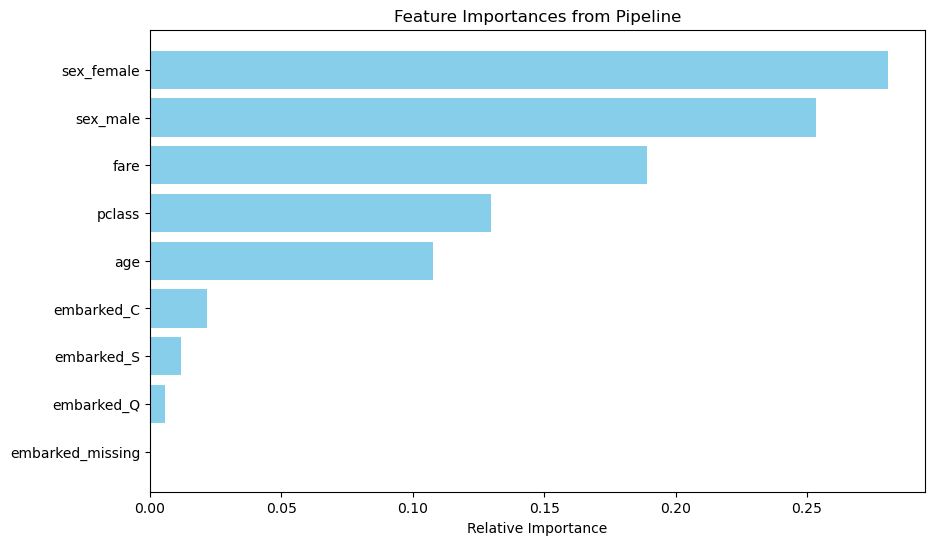

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer # 不同特征列用不同处理
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # 缺失值处理
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config

# 设置 sklearn 输出为图表模式，这是可视化 Pipeline 的关键
# 让 Pipeline 在 Jupyter Notebook 里显示成漂亮的流程图
set_config(display='diagram')

from sklearn.datasets import fetch_openml 
X, y = fetch_openml("titanic", version=1, 
                    as_frame=True, return_X_y=True)

features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = X[features]

# 1. 定义 数值特征 处理流程: 先填补缺失值，再标准化
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2. 定义 类别特征 处理流程: 先填补缺失值，再进行独热编码
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. 使用 ColumnTransformer 将上述两种处理合并 为 preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. 构建终极 Pipeline：预处理 + 随机森林分类器
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 定义参数网格 (参数名必须是：步骤名 + 双下划线 + 参数名)
# Pipeline 中调参，必须用 步骤名__参数名
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],# 试试平均值填补好还是中位数好
    'classifier__n_estimators': [50, 100, 200],# 随机森林里树的数量
    'classifier__max_depth': [None, 5, 10],# 树的深度
}

# 实例化网格搜索 cv=5 表示 5 折交叉验证
# # n_jobs=-1 表示动用你电脑所有 CPU 核心去跑，速度最快
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 训练模型
grid_search.fit(X_train, y_train)

print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳验证集得分: {grid_search.best_score_:.4f}")

# 提取最优模型
best_model = grid_search.best_estimator_

# 获取经 OneHot 编码后的特征名称
# OneHot 编码后，'Sex' 变成了 'Sex_male', 'Sex_female'
# ColumnTransformer 存储处理器的列表。
# [1] 代表第二个处理器（即定义的类别特征处理器 cat）。
# 它返回一个元组 ('cat', pipeline, columns)
# [1]: 拿到元组第二个元素，也就是专门处理 类别 的 Pipeline。
# .named_steps['onehot']: 进入类别 Pipeline，找到名为 onehot 的步骤。
# .get_feature_names_out(...): OneHot把原来的列变成了哪些新列。
ohe_features = best_model.named_steps['preprocessor']\
               .transformers_[1][1]\
               .named_steps['onehot']\
               .get_feature_names_out(categorical_features)

all_features = numeric_features + list(ohe_features)

# 提取特征重要性
importances = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)
# 排序索引。比如重要性是 [0.1, 0.5, 0.2]，它会返回 [0, 2, 1]
# 绘图 barh 横向条形图
plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Pipeline')
plt.barh(y=range(len(indices)), width=importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

准确率 (Accuracy): 1.0000

分类报告:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\19588\AppData\Local\Temp\ipykernel_13384\1107286418.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names,


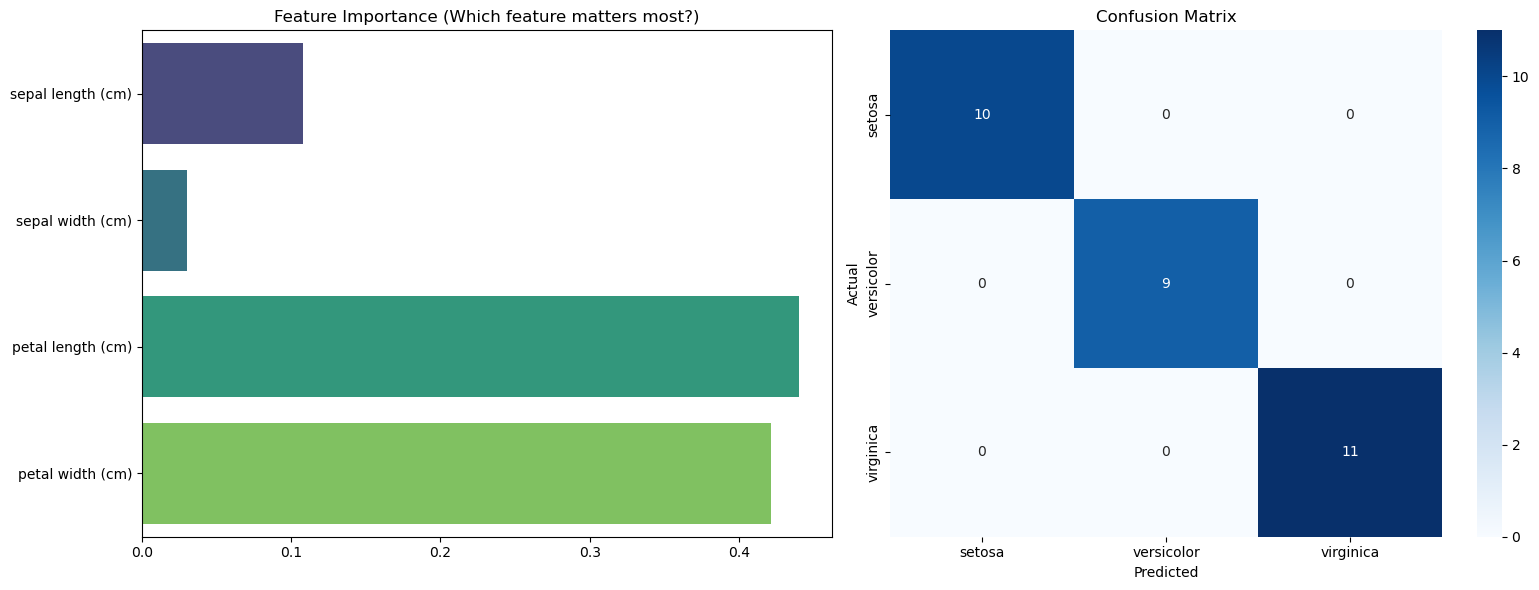

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = datasets.load_iris()
X = iris.data  # 特征: 花萼长度, 花萼宽度, 花瓣长度, 花瓣宽度
y = iris.target # 标签: 0, 1, 2 (三种不同的鸢尾花)
feature_names = iris.feature_names

# 为了方便可视化，我们转成 DataFrame X (150, 4) ndarray
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# 2. 数据切分 (80% 训练, 20% 测试)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. 特征标准化 (使数据均值为0, 方差为1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 训练集：计算并转换
X_test = scaler.transform(X_test)       # 测试集：只转换，不重新计算参数

# 4. 初始化并训练模型 (随机森林)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. 进行预测
y_pred = model.predict(X_test)

# 6. 模型评估
print(f"准确率 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\n分类报告:\n", classification_report(y_test, y_pred))

# --- 7. 可视化部分 ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 图 1: 特征重要性 (随机森林可以告诉你哪些特征最有用)
importances = model.feature_importances_
sns.barplot(x=importances, y=feature_names, 
            ax=axes[0], palette='viridis')
axes[0].set_title("Feature Importance (Which feature matters most?)")

# 图 2: 混淆矩阵 (看看模型在哪里犯了错)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

| 编码方式 | 英文名 | 核心逻辑 | 适用场景 | 例子 | 潜在风险 |
|---------|--------|----------|----------|--------|----------|
| 标签编码 | LabelEncoder / OrdinalEncoder | 给每个类别分配一个整数（0, 1, 2...） | 有序分类（Ordinal）：数据之间有等级、大小关系 | 学历（高中 < 本科 < 硕士） | 如果用在无序数据上，模型会误以为数字存在大小关系，产生错误的数学偏见 |
| 独热编码 | OneHotEncoder | 为每个类别创建一个新列（0或1） | 无序分类（Nominal）：数据之间没有等级关系 | 颜色（红、蓝、绿）、城市（北京、上海） | 类别特别多时（如邮编），会产生大量新列，导致“维度爆炸” |

原始数据前5行:
   Age  Salary      City    Education  Purchased
0   58   24166   Beijing       Master          0
1   48   26330   Beijing     Bachelor          0
2   34   10486  Shanghai  High School          0
3   27   13335   Beijing     Bachelor          1
4   40   26364  Shanghai  High School          0

处理后的训练集前5行 (OneHot展开了，Education变成了数字):
          Age    Salary  Education  City_Beijing  City_Shanghai  City_Shenzhen
249 -0.119370  1.620935        1.0           0.0            0.0            1.0
433  1.171112  0.182789        1.0           0.0            1.0            0.0
19   1.429208  1.456009        0.0           0.0            0.0            1.0
322  1.601272  0.158099        2.0           0.0            1.0            0.0
332 -1.237787 -1.429161        0.0           0.0            1.0            0.0

=== 手动处理模型评估 ===
              precision    recall  f1-score   support

           0       0.49      0.42      0.45        53
           1       0.44      0.51      0.47        47

 

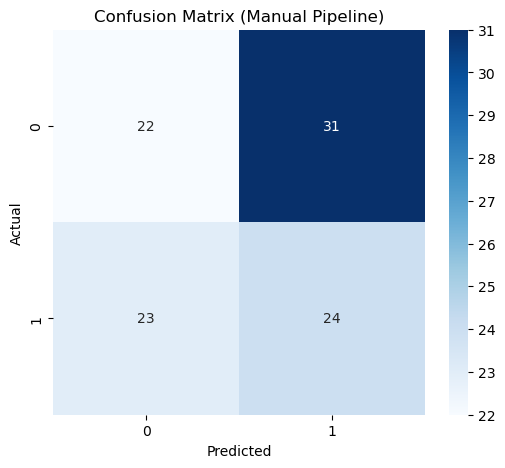

In [ ]:
# LabelEncoder用来处理标签 y 的（将 ['cat', 'dog'] 变成 [0, 1]）
#  对于特征 X，应用OrdinalEncoder，
# 因为它支持直接处理 2D 数组，且便于集成到 Pipeline 中。

# 手动
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 预测是否购买 1 0
np.random.seed(42)
n_samples = 500
df = pd.DataFrame({
    'Age': np.random.randint(20, 60, n_samples),
    'Salary': np.random.randint(5000, 30000, n_samples),
    'City': np.random.choice(['Beijing', 'Shanghai', 'Shenzhen'], n_samples), # 无序
    'Education': np.random.choice(['High School', 'Bachelor', 'Master'], n_samples), # 有序
    'Purchased': np.random.choice([0, 1], n_samples) # 目标
})

print("原始数据前5行:")
print(df.head())

# --- 2. 数据切分 ---
# 在一切预处理（包括编码、标准化）之前切分数据
X = df.drop('Purchased', axis=1) # 删掉目标列 X是特征列
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42) # shuffle 打乱

# 步骤 A: 处理有序特征 (Education) -> OrdinalEncoder 0 1 2
# OrdinalEncoder 默认按照字母顺序（A-Z）来分配数字 0 1 2
edu_order = [['High School', 'Bachelor', 'Master']] # 依次0 1 2 矩阵
ord_enc = OrdinalEncoder(categories=edu_order)

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

X_train_processed['Education'] = ord_enc.fit_transform(X_train[['Education']])
X_test_processed['Education'] = ord_enc.transform(X_test[['Education']])

# 步骤 B: 处理无序特征 (City) -> OneHotEncoder
# sparse_output=False 可以直接看到生成的数组，而不是稀疏矩阵
# handle_unknown='ignore' 
# 如果测试集里出现了训练集没见过的城市，自动忽略，防止报错
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # 编码器

city_train_ohe = ohe.fit_transform(X_train[['City']]) # (400, 3) ndarray
city_test_ohe = ohe.transform(X_test[['City']]) # (100, 3) ndarray

# 将 OneHot 后的数组转回 DataFrame 生成新列名称 让 0 1 列更直观
city_cols = ohe.get_feature_names_out(['City'])
# ['City_Beijing' 'City_Shanghai' 'City_Shenzhen'] ndarray

df_city_train = pd.DataFrame(city_train_ohe, columns=city_cols, index=X_train.index) # (400, 3)
df_city_test = pd.DataFrame(city_test_ohe, columns=city_cols, index=X_test.index)

# 拼接：删掉原来的 City 列，接上新的 Beijing/Shanghai/Shenzhen 列
X_train_processed = pd.concat([X_train_processed.drop('City', axis=1), df_city_train], axis=1)
X_test_processed = pd.concat([X_test_processed.drop('City', axis=1), df_city_test], axis=1)

# 步骤 C: 数值特征标准化
scaler = StandardScaler()
num_cols = ['Age', 'Salary']
X_train_processed[num_cols] = scaler.fit_transform(X_train_processed[num_cols])
X_test_processed[num_cols] = scaler.transform(X_test_processed[num_cols])

print("\n处理后的训练集前5行 (OneHot展开了，Education变成了数字):")
print(X_train_processed.head())

model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

print("\n=== 手动处理模型评估 ===")
print(classification_report(y_test, y_pred))
print(f"准确率: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Manual Pipeline)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== Pipeline 模型评估 ===
准确率: 0.46
特征: pclass               重要性: 0.3525
特征: age                  重要性: 0.5176
特征: fare                 重要性: 0.0803
特征: sex_female           重要性: 0.0149
特征: sex_male             重要性: 0.0156
特征: embarked_C           重要性: 0.0191


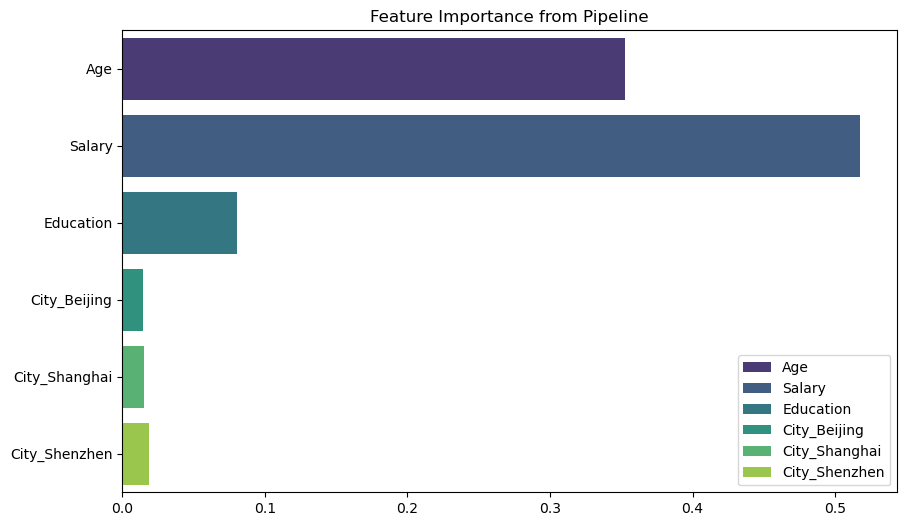

In [17]:
# Pipeline 和 ColumnTransformer 实现同样功能
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

np.random.seed(42)
n_samples = 500
df = pd.DataFrame({
    'Age': np.random.randint(20, 60, n_samples),
    'Salary': np.random.randint(5000, 30000, n_samples),
    'City': np.random.choice(['Beijing', 'Shanghai', 'Shenzhen'], n_samples), # 无序
    'Education': np.random.choice(['High School', 'Bachelor', 'Master'], n_samples), # 有序
    'Purchased': np.random.choice([0, 1], n_samples) # 目标
})
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --- 1. 定义转换器 (Transformers) ---
# 数值列处理：标准化
numeric_features = ['Age', 'Salary']
numeric_transformer = StandardScaler()

# 有序分类处理：Ordinal 编码
ordinal_features = ['Education']
ordinal_transformer = OrdinalEncoder(
    categories=[['High School', 'Bachelor', 'Master']])

# 无序分类处理：OneHot 编码
categorical_features = ['City']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# --- 2. 组合拳：ColumnTransformer ---
# 根据列名，自动把 不同的列 分发给不同的转换器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 3. 搭建完整管道 (Pipeline) ---
# 数据 -> 预处理 (preprocessor) -> 模型 (classifier)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

# --- 4. 一键训练与预测 ---
# 直接把原始的 X_train 扔进去，不需要手动去 drop 列或 concat
clf.fit(X_train, y_train)
y_pred_pipe = clf.predict(X_test)

print("\n=== Pipeline 模型评估 ===")
print("准确率:", accuracy_score(y_test, y_pred_pipe))

# --- 5. 可视化：Pipeline 内部的特征重要性 ---

# 1. 获取 OneHot 编码后的新列名
# _ 表示这是一个经过 fit 训练后的属性 返回数组 如['City_Beijing', 'City_Shanghai', 'City_Shenzhen']
ohe_feature_names = clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# 2. 组合所有列名：数值 + 有序 + OneHot新列 list相加
all_feature_names = numeric_features + ordinal_features + list(ohe_feature_names)
# 3. 获取特征重要性数值 ndarray
importances = clf.named_steps['classifier'].feature_importances_

for name, imp in zip(all_features, importances):
    print(f"特征: {name:20} 重要性: {imp:.4f}")

# 绘图
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=all_feature_names, hue=all_feature_names, palette='viridis', legend=True)
plt.title("Feature Importance from Pipeline")
plt.show()

In [21]:
for name, imp in zip(all_features, importances):
   # print(f'{name:20} 重要性: {imp:.4f}') # 左对齐
    print(f'{name:>20} 重要性: {imp:.4f}') # 右对齐
   # print(f'{name:^20} 重要性: {imp:.4f}') # 居中对齐

              pclass 重要性: 0.3525
                 age 重要性: 0.5176
                fare 重要性: 0.0803
          sex_female 重要性: 0.0149
            sex_male 重要性: 0.0156
          embarked_C 重要性: 0.0191


手动目标编码准确率: 0.4600


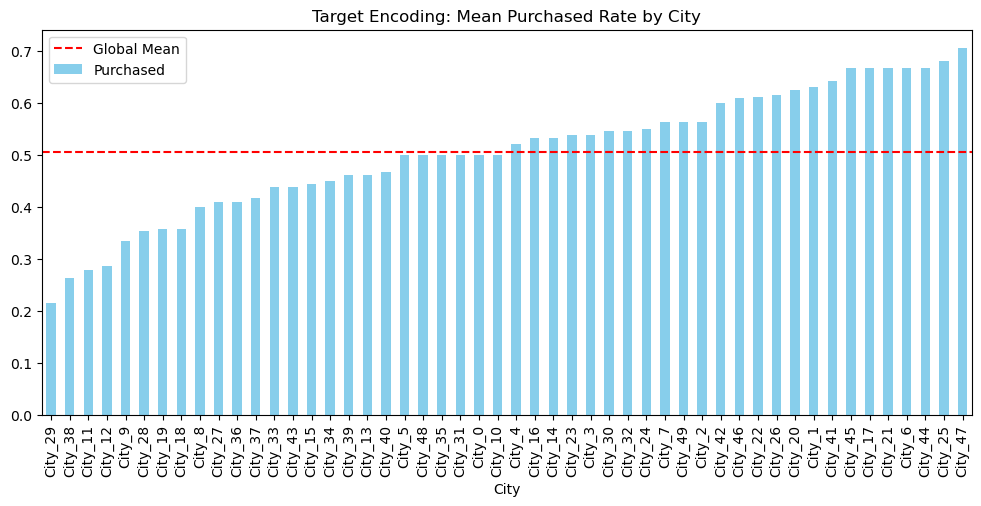

In [ ]:
# target encoding 用该类别对应的目标变量的平均值 替换类别 如0.8
# 仅在训练集上计算各分类均值 再应用到测试集，防止数据泄漏
# 适用于类别数较多的分类特征（高基数特征，如1000个城市

# 手动
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 构造高基数数据集 预测是否买 1 0
np.random.seed(42)
n_samples = 1000
# 50 个不同的城市（高基数）
cities = [f'City_{i}' for i in range(50)]
df = pd.DataFrame({
    'City': np.random.choice(cities, n_samples),
    'Salary': np.random.randint(5000, 20000, n_samples),
    'Purchased': np.random.choice([0, 1], n_samples)
})

# 2. 切分数据
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --- 目标编码 ---

# A. 在训练集中计算每个城市的购买率（均值）
# 把 y 拼回去算均值
train_temp = pd.concat([X_train, y_train], axis=1) # 左右拼
city_means = train_temp.groupby('City')['Purchased'].mean()
# (50,) Series 索引是城市名 值是均值

# B. 获取训练集的全局均值（用于处理train没见过的类别）
global_mean = y_train.mean()

# C. 映射到训练集
X_train_encoded = X_train.copy()
X_train_encoded['City'] = X_train['City'].map(city_means)
# 遍历 City 列，把每个城市换成对应均值 .map(Series)根据索引映射

# D. 映射到测试集
# 如果写 X_test_encoded = X_test，它们在内存中指向同一个对象。
# 修改 X_test_encoded 时，原始的 X_test 也会被改掉
# 而.copy() 会创建一个新的 DataFrame 副本，避免修改原始数据 但耗内存
X_test_encoded = X_test.copy()
X_test_encoded['City'] = X_test['City'].map(city_means)

# E. 填充空值（如果测试集有新城市，map 之后会产生 NaN）
X_test_encoded['City'] = X_test_encoded['City'].fillna(global_mean)

# --- 训练与评估 ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

print(f"手动目标编码准确率: {accuracy_score(y_test, y_pred):.4f}")

# 可视化：类别与均值的映射关系
plt.figure(figsize=(12, 5))
city_means.sort_values().plot(kind='bar', color='skyblue')
plt.axhline(y=global_mean, color='r', linestyle='--', label='Global Mean')
plt.title("Target Encoding: Mean Purchased Rate by City")
plt.legend()
plt.show()


如果数据本身完全随机，任何模型（无论是随机森林还是大模型）的准确率都会在 0.5（瞎猜） 左右

Pipeline 目标编码准确率: 0.5000
{'preprocessor': ColumnTransformer(transformers=[('target_enc',
                                 TargetEncoder(target_type='binary'),
                                 ['City']),
                                ('num', 'passthrough', ['Salary'])]), 'classifier': RandomForestClassifier(random_state=42)}
[('target_enc', TargetEncoder(target_type='binary'), ['City']), ('num', FunctionTransformer(accept_sparse=True, check_inverse=False,
                    feature_names_out='one-to-one'), ['Salary'])]


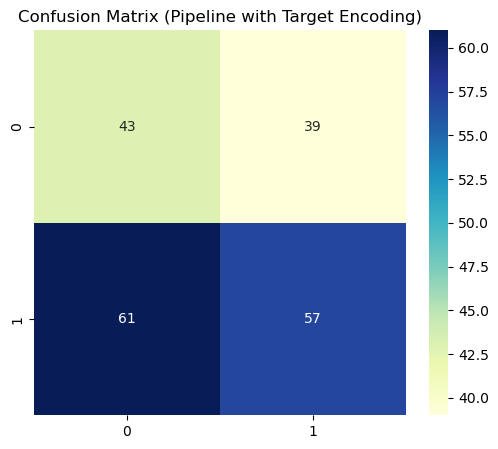

In [29]:
# Pipeline
# TargetEncoder 内置平滑机制 如果类别样本过少 会向全局均值靠拢
# 如果某个城市只有 1 个人，会把这个城市的均值向全局均值拉拢，防止过拟合
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. 定义预处理逻辑
# TargetEncoder 专门处理分类列
# 它会自动处理数据切分中的均值计算，防止泄露
categorical_features = ['City']
numeric_features = ['Salary']

# 2. 组装 ColumnTransformer
# 注意：TargetEncoder 需要知道目标变量 y，Pipeline 会自动处理这一点
preprocessor = ColumnTransformer(
    transformers=[
        ('target_enc', TargetEncoder(target_type='binary'), categorical_features),
        ('num', 'passthrough', numeric_features) # 数值列不处理，直接通过
    ]) # 名字 处理器 针对列名列表 y目标是二分类

# 3. 建立 Pipeline 预处理和模型
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 4. 训练（在 Pipeline 中，fit 会同时接收 X 和 y）
clf.fit(X_train, y_train)

# 5. 预测与评估
y_pred_pipe = clf.predict(X_test)
print(f"Pipeline 目标编码准确率: {accuracy_score(y_test, y_pred_pipe):.4f}")

# Pipeline 的所有步骤
print(clf.named_steps)

# 预处理车间里的具体转换器
print(clf.named_steps['preprocessor'].transformers_)

# --- 可视化：混淆矩阵 ---
cm = confusion_matrix(y_test, y_pred_pipe)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (Pipeline with Target Encoding)")
plt.show()

In [ ]:
# 交叉验证 XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid")

# 1. 生成模拟数据 (2000个样本, 20个特征)
# weights=[0.9, 0.1] 类别不平衡 (90% 负样本-类别0, 10% 正样本-类别1)
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, 
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)
# 10 个有用特征，与目标y相关；5 个冗余特征（由信息特征线性组合生成）
# 特征矩阵 X 是 ndarray (2000, 20) y 是 ndarray (2000,)

# 转为 DataFrame 以便处理
feature_names = [f'Feat_{i}' for i in range(20)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# 为演示非数值列，手动把 'Feat_0' 变成分类特征 (Low, Medium, High)
# binning 均匀切成三份 基于数值范围 把区间如(0.1,0.5]映射成类别标签)
# 有些特征在数值上波动很大，只关心它是“高”还是“低”。
# 例如，把“年龄”切成“少年”、“青年”、“老年”
df['Category'] = pd.cut(df['Feat_0'], bins=3, labels=['Low', 'Medium', 'High'])
df = df.drop('Feat_0', axis=1) # 删掉原来的数值列

# 如果正样本极少（如 1%），你在后续的交叉验证中
# 必须使用 StratifiedKFold（分层采样）来确保每一折里都能抽到正样本
print("正负样本比例:")
print(df['Target'].value_counts(normalize=True)) # 唯一值出现次数 转为比例
# 对不平衡数据，准确率没用，必须看 AUC 或者 F1-score
# （这些指标更关注那 10% 的正样本抓得对不对

正负样本比例:
Target
0    0.896
1    0.104
Name: proportion, dtype: float64


=== 开始 5 折交叉验证 (手动循环) ===
第 1 折 AUC: 0.9314
第 2 折 AUC: 0.9549
第 3 折 AUC: 0.9397
第 4 折 AUC: 0.9274
第 5 折 AUC: 0.9405


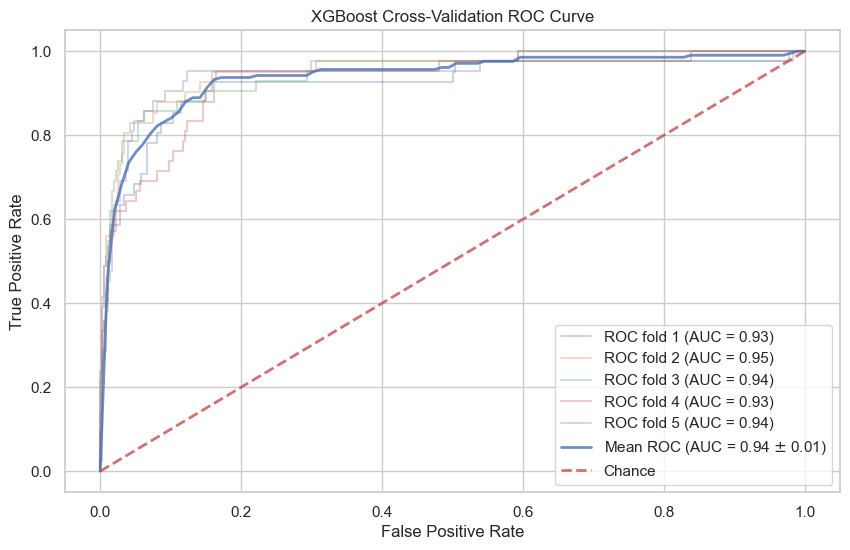

In [ ]:
# 法一 手动
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import auc, roc_curve, accuracy_score
import xgboost as xgb

# 准备数据
X_manual = df.drop('Target', axis=1)
y_manual = df['Target']

# 1. XGBoost 只接受输入为数值型数据，即数字
# 处理分类变量 'Category'
# OrdinalEncoder 会默认按字母顺序排序
ord_enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
X_manual['Category'] = ord_enc.fit_transform(X_manual[['Category']])

# --- 2. 初始化交叉验证器 ---
# 5折交叉验证，shuffle=True 分层采样 保证每一折里正负比例也都是 1:9
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化 XGBoost
clf = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, 
                         eval_metric='logloss', random_state=42)

# --- 3. 手动写 CV 循环并绘图 ---
fig, ax = plt.subplots(figsize=(10, 6))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # 用于计算平均曲线的插值点

print("=== 开始 5 折交叉验证 (手动循环) ===")

# cv.split 会返回每一折的 训练集索引(train) 和 验证集索引(test)
for i, (train_idx, val_idx) in enumerate(
    cv.split(X_manual, y_manual)):
    # 切分数据
    X_train_fold, X_val_fold = X_manual.iloc[train_idx], X_manual.iloc[val_idx]
    y_train_fold, y_val_fold = y_manual.iloc[train_idx], y_manual.iloc[val_idx]
    
    # 训练模型 每折都要重新 fit
    clf.fit(X_train_fold, y_train_fold)
    
    # 预测概率 (用于画 ROC)
    y_probas = clf.predict_proba(X_val_fold)[:, 1]
    
    # 计算 ROC 曲线坐标 {假阳性率, 真阳性率, 阈值}
    fpr, tpr, _ = roc_curve(y_val_fold, y_probas)
    # 把你的 y_probas（模型预测的概率，
    # 比如 $0.1, 0.4, 0.7, 0.9$）从大到小排序
    # 把每一个概率值都当做阈值，计算对应的 FPR 和 TPR 点 ROC 曲线

    # 记录 AUC 分数
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    print(f"第 {i+1} 折 AUC: {roc_auc:.4f}")
    
    # 画出这一折的曲线 (浅色)
    ax.plot(fpr, tpr, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
    
    # 插值计算 TPR，以便计算平均曲线
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# --- 4. 绘制平均曲线 ---
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# 绘制对角线 (瞎猜基准线)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="XGBoost Cross-Validation ROC Curve",
       xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend(loc="lower right")
plt.show()

In [37]:
fruits = ['Apple', 'Banana', 'Orange']

# i 是索引（从 0 开始），fruit 是具体内容
for i, fruit in enumerate(fruits):
    print(f"第 {i+1} 个水果是: {fruit}")


第 1 个水果是: Apple
第 2 个水果是: Banana
第 3 个水果是: Orange


最佳参数组合: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
最佳交叉验证 AUC: 0.5145
测试集准确率: 0.4600


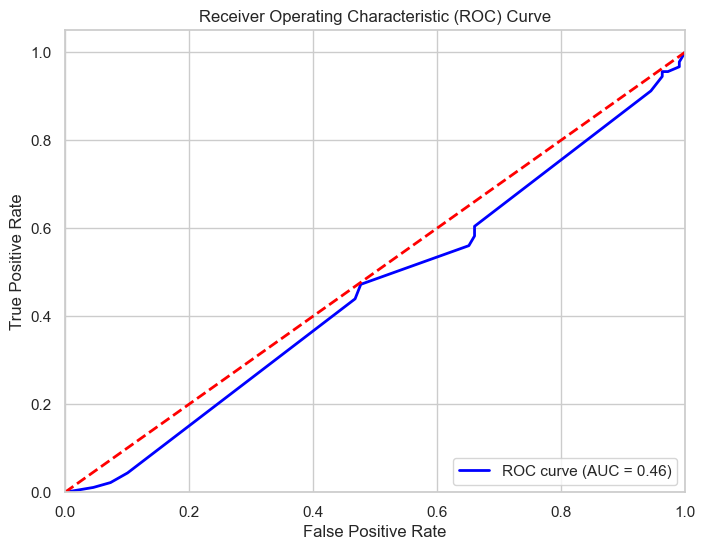

In [ ]:
# 法二 使用 Pipeline 和 GridSearchCV 自动化交叉验证
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder, StandardScaler
import xgboost as xgb

# 1. 构造数据
rng = np.random.default_rng(42) # 生成随机数的生成器
n_samples = 1000 
df = pd.DataFrame({
    'City': rng.choice([f'City_{i}' for i in range(50)], n_samples),
    'Salary': rng.integers(5000, 20000, n_samples),
    'Age': rng.integers(20, 60, n_samples),
    'Purchased': rng.choice([0, 1], n_samples)
})

X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. 定义 Pipeline (预处理部分)
preprocessor = ColumnTransformer(transformers=[
    ('t_enc', TargetEncoder(target_type='binary'), ['City']),
    ('num', StandardScaler(), ['Salary', 'Age'])
])

# 3. 组装总 Pipeline (预处理 + 模型)
# 给模型起名叫 'xgb'，后面调参要用到
pipe = Pipeline([
    ('prep', preprocessor),
    ('xgb', xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

# 4. 定义参数网格
# 规则：步骤名 + __ (双下划线) + 参数名
param_grid = {
    'xgb__n_estimators': [50, 100],        # 尝试 50 棵或 100 棵树
    'xgb__max_depth': [3, 6],              # 尝试深度为 3 或 6
    'xgb__learning_rate': [0.1, 0.01]      # 尝试不同的学习率
}

# 5. 初始化网格搜索 (带 5 折交叉验证)
# cv=5: 每一组参数 都会跑 5 次交叉验证 来算平均分
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# 带着流水线 和 参数网格 去跑交叉验证

# 6. fit (全自动：预处理 -> 组合参数 -> 交叉验证 -> 选出最强)
grid_search.fit(X_train, y_train)

# --- 结果评估 ---
print(f"最佳参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证 AUC: {grid_search.best_score_:.4f}")

# results_df = pd.DataFrame(grid_search.cv_results_)
# 参数组合和对应的平均分，按分数排序
# print(results_df[['params', 'mean_test_score', 'std_test_score']].sort_values
# (by='mean_test_score', ascending=False))

# 使用选出的最强模型 在测试集上最后检验
best_model = grid_search.best_estimator_ # Pipeline 对象
test_score = best_model.score(X_test, y_test)
print(f"测试集准确率: {test_score:.4f}")

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
y_probas = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probas)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score', 'std_test_score']].sort_values
(by='mean_test_score', ascending=False))

print(f"表格的形状是: {results_df.shape}")
print(f"总共尝试了 {results_df.shape[0]} 种参数组合")
print(f"每种组合记录了 {results_df.shape[1]} 项指标数据")

# 如果 mean_test_score 很高，但 std_test_score 也很大，
# 说明模型不稳定，换了一拨数据可能就不灵了

# 如果发现最好的参数总是落在设定的边缘（比如试了 max_depth: [3, 6]，
# 结果 6 最好），说明可能需要尝试更高的值（比如 10）

                                              params  mean_test_score  \
4  {'xgb__learning_rate': 0.01, 'xgb__max_depth':...         0.514500   
5  {'xgb__learning_rate': 0.01, 'xgb__max_depth':...         0.514201   
1  {'xgb__learning_rate': 0.1, 'xgb__max_depth': ...         0.511495   
6  {'xgb__learning_rate': 0.01, 'xgb__max_depth':...         0.511102   
0  {'xgb__learning_rate': 0.1, 'xgb__max_depth': ...         0.505165   
3  {'xgb__learning_rate': 0.1, 'xgb__max_depth': ...         0.502392   
7  {'xgb__learning_rate': 0.01, 'xgb__max_depth':...         0.489001   
2  {'xgb__learning_rate': 0.1, 'xgb__max_depth': ...         0.484133   

   std_test_score  
4        0.047571  
5        0.045444  
1        0.037550  
6        0.037290  
0        0.030490  
3        0.035979  
7        0.038425  
2        0.036956  
表格的形状是: (8, 16)
总共尝试了 8 种参数组合
每种组合记录了 16 项指标数据
